# Telco Customer Churn
By: Jose Fernando A. Gonzales

The purpose of this project is to practice my data analysis skills and learn how to deploy production-grade machine learning models.

## Downloading the dataset

In [1]:
# import kagglehub

# path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# print(f"Dataset downloaded to: {path}")

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve, 
    average_precision_score, 
    f1_score, 
    auc
)

## Load and Inspect Dataset

In [3]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of observations: 7043
Number of features: 21


## Data Cleaning and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Dropping customerID since it is not important
df = df.drop(columns=['customerID'])

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

print(df['TotalCharges'].isna().sum())

0


## Exploratory Data Analysis (EDA)

In [7]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [8]:
df[categorical_features].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

In [9]:
for col in categorical_features:
    print(f"Values for {col}: {df[col].unique()}")

print(f"Values for Churn: {df['Churn'].unique()}")

df[numerical_features].describe()

Values for gender: ['Female' 'Male']
Values for SeniorCitizen: [0 1]
Values for Partner: ['Yes' 'No']
Values for Dependents: ['No' 'Yes']
Values for PhoneService: ['No' 'Yes']
Values for MultipleLines: ['No phone service' 'No' 'Yes']
Values for InternetService: ['DSL' 'Fiber optic' 'No']
Values for OnlineSecurity: ['No' 'Yes' 'No internet service']
Values for OnlineBackup: ['Yes' 'No' 'No internet service']
Values for DeviceProtection: ['No' 'Yes' 'No internet service']
Values for TechSupport: ['No' 'Yes' 'No internet service']
Values for StreamingTV: ['No' 'Yes' 'No internet service']
Values for StreamingMovies: ['No' 'Yes' 'No internet service']
Values for Contract: ['Month-to-month' 'One year' 'Two year']
Values for PaperlessBilling: ['Yes' 'No']
Values for PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Values for Churn: ['No' 'Yes']


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


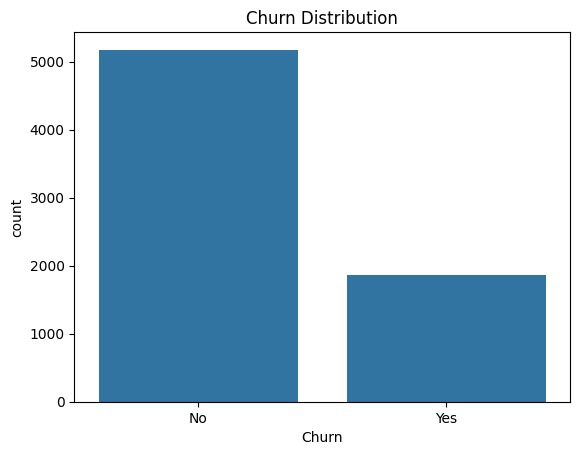

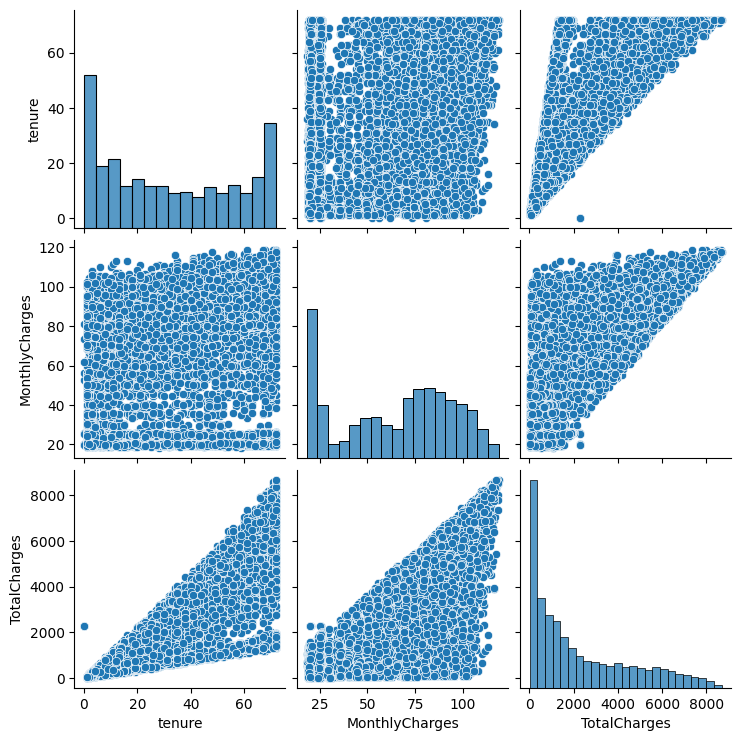

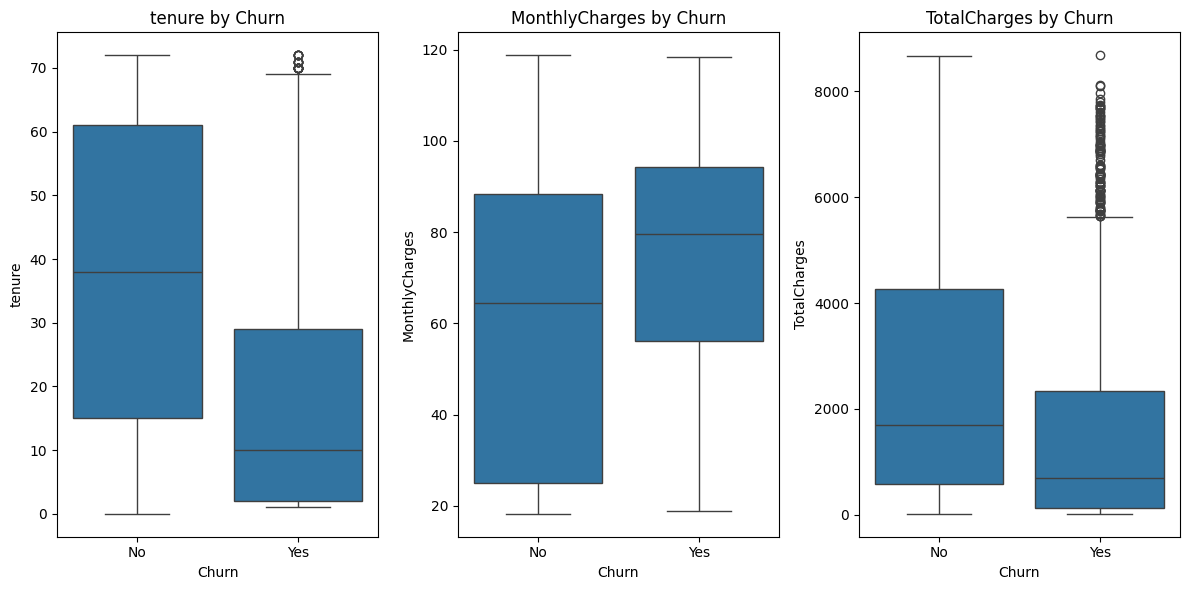

In [10]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

sns.pairplot(df[numerical_features])
plt.show()

plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} by Churn")

plt.tight_layout()
plt.show()

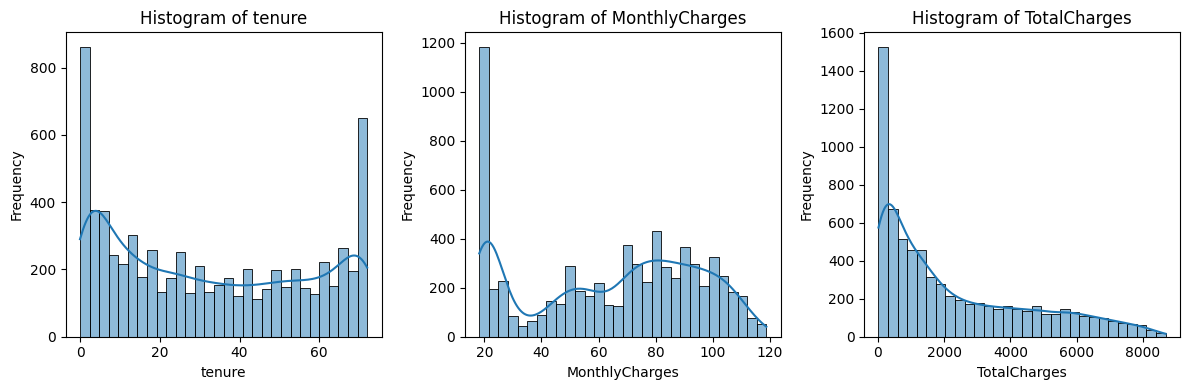

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, bins=30, ax=ax[i])
    ax[i].set_title(f'Histogram of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Data Splitting and Preprocessing Pipelines

In [12]:
X = df[numerical_features + categorical_features]
y = df['Churn'].map({"Yes": 1, "No": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Model Training (Logistic Regresion)

Given that this is a classification problem, I will start with using a logistic regression.

In [13]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Evaluating Model Performance

In [14]:
y_predicted = pipeline.predict(X_test)
y_predicted_proba = pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_predicted)
report = classification_report(y_test, y_predicted)
conf_matrix = confusion_matrix(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report: \n{report}")

Accuracy: 0.7388
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



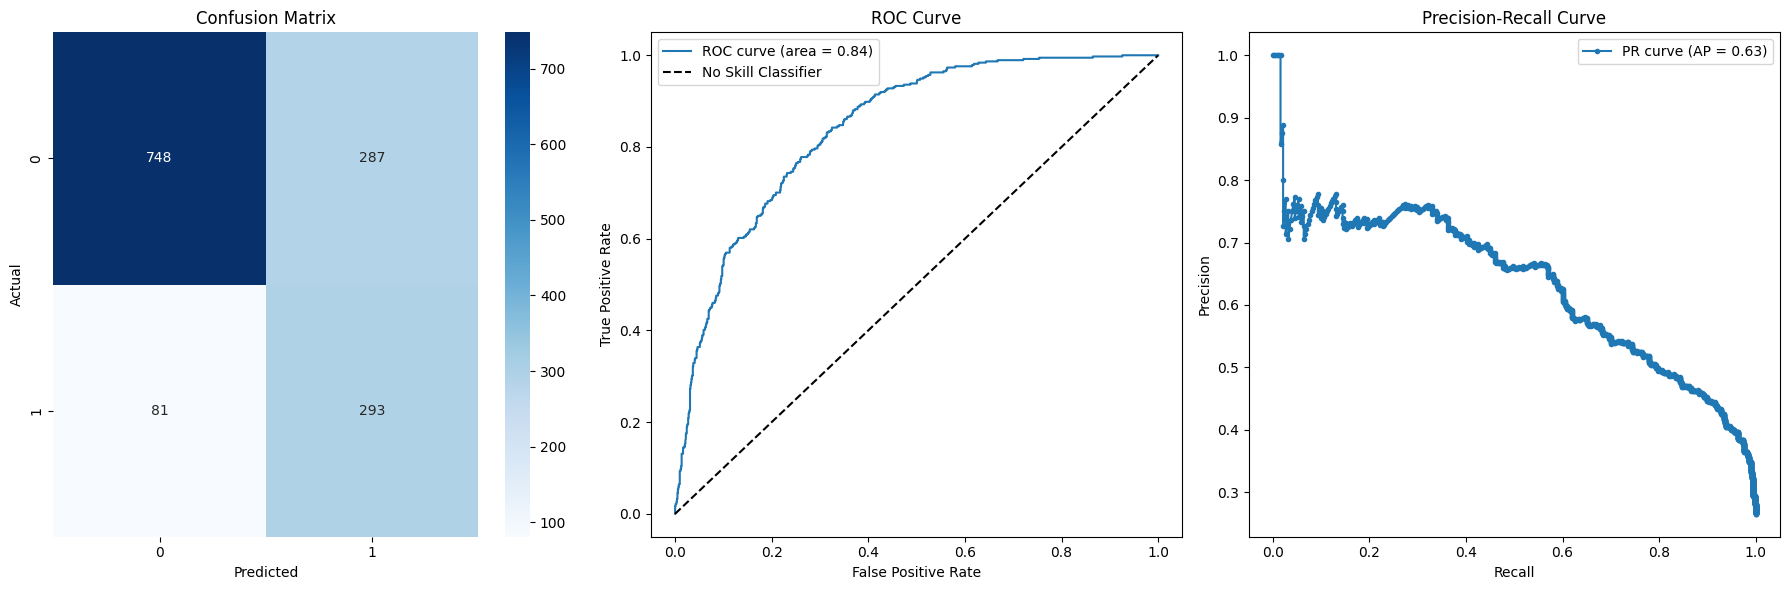

In [15]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_predicted_proba)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_proba)
avg_precision = average_precision_score(y_test, y_predicted_proba)

sns.heatmap(conf_matrix, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

ax[1].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--', label='No Skill Classifier')
ax[1].set_title('ROC Curve')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend()

# Precision-Recall curve
ax[2].plot(recall, precision, marker='.', label=f'PR curve (AP = {avg_precision:.2f})')
ax[2].set_title('Precision-Recall Curve')
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precision')
ax[2].legend()

plt.tight_layout()
plt.show()

## Insights and Recommendations

The logistic regression model achieves an AUC of 0.84, indicating strong discriminative power. With recall at 78%, the model is effective at catching most churners. However, with the precision of 51%, about half are false positives. This means that about half of the predicted churners were actually not churners. This tradeoff is acceptable if the business priority is to maximize churn detection and retain as many at-risk customers as possible, even at the cost of some extra marketing effort.

Looking at the various features analyzed by the model, we gained the following insights:

* Internet Service Fiber Optic has the highest odds ratio (OR=3.40), meaning customers with fiber optic internet are over 3 times more likely to churn compared to the baseline.
* Total Charges (OR=1.59) is also a associated with increased churn risk.
* Customers using Streaming Movies and Streaming TV (OR=1.53-1.49)  serices are about 1.5 times more likely to churn.
* Customers using Electronig Checks as payment method (OR=1.49) are at higher risk of churning.
* Long-term contracts such as Contract of one year or two years (OR=0.24) strongly reduces churn risk.
* Customers using Tech Support (OR=0.77), Online Security (OR=0.72), and Phone Service (OR=0.71) are at lower risk of churning.

**Recommendation**

* We would recommend that retention campaigns should focus on customers with fiber optic internet, high total charges, and using streaming services. The business should also assess the mentioned services and investigate the reason for high churn rate on customers using those services.
* Another strategy is to encourage switching to one or two-year contracts as these are strongly protective against churn.
* Considering the strong protective effects of tech support, online security, and phone services, consider bundling them with other services.
* The business should look into why electronic check users are more likely to churn and encourage them to switch to other payment methods.
* Pay special attention to new customers since they are more likely to leave compared to those with high tenure.

In [16]:
model = pipeline.named_steps['classifier']

coefficients = model.coef_[0]
a = model.intercept_[0]
feature_names = preprocessor.get_feature_names_out()
odds_ratios = np.exp(coefficients)

pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients.round(4),
    'Odds Ratio': odds_ratios.round(4),
    'Interpretation': ["Increase churn risk" if c > 0 else "Decrease churn risk" for c in coefficients]
}).sort_values(by="Odds Ratio", ascending=False)

,Feature,Coefficient,Odds Ratio,Interpretation
10,cat__InternetService_Fiber optic,1.2226,3.3961,Increase churn risk
2,num__TotalCharges,0.4624,1.5879,Increase churn risk
23,cat__StreamingMovies_Yes,0.4250,1.5296,Increase churn risk
28,cat__PaymentMethod_Electronic check,0.3980,1.4889,Increase churn risk
21,cat__StreamingTV_Yes,0.3980,1.4889,Increase churn risk
26,cat__PaperlessBilling_Yes,0.3357,1.3989,Increase churn risk
9,cat__MultipleLines_Yes,0.3259,1.3853,Increase churn risk
4,cat__SeniorCitizen_1,0.1529,1.1652,Increase churn risk
29,cat__PaymentMethod_Mailed check,0.0484,1.0495,Increase churn risk
17,cat__DeviceProtection_Yes,0.0423,1.0432,Increase churn risk


## Exploration of other thresholds

In [17]:
# Helper to print evaluation at a given threshold
def eval_at_threshold(threshold, tag="threshold"):
    preds = (y_predicted_proba >= threshold).astype(int)
    print(f"\n== Evaluation at {tag} = {threshold:.4f} ==")
    print(f"Accuracy: { (preds==y_test).mean():.4f}")
    print(classification_report(y_test, preds, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_test, preds))

In [18]:
f1_scores = []
for t in thresholds:
    preds = (y_predicted_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))

best_idx_f1 = int(np.argmax(f1_scores))
best_thr_f1 = thresholds[best_idx_f1]
best_f1 = f1_scores[best_idx_f1]

# 2) Find threshold by Youden's J (maximize TPR - FPR) on ROC curve
youden = tpr - fpr
best_idx_youden = int(np.argmax(youden))
best_thr_youden = roc_thresholds[best_idx_youden]
best_roc_auc = auc(fpr, tpr)

In [19]:
# Show results
print(f"Best F1 threshold: {best_thr_f1:.4f}  (F1 = {best_f1:.4f})")
eval_at_threshold(best_thr_f1, tag="best F1")

Best F1 threshold: 0.5686  (F1 = 0.6236)

== Evaluation at best F1 = 0.5686 ==
Accuracy: 0.7644
              precision    recall  f1-score   support

           0     0.8901    0.7749    0.8285      1035
           1     0.5413    0.7353    0.6236       374

    accuracy                         0.7644      1409
   macro avg     0.7157    0.7551    0.7260      1409
weighted avg     0.7975    0.7644    0.7741      1409

Confusion matrix:
 [[802 233]
 [ 99 275]]


In [20]:
print(f"\nYouden's J best threshold: {best_thr_youden:.4f}  (TPR-FPR = {youden[best_idx_youden]:.4f})")
eval_at_threshold(best_thr_youden, tag="Youden's J")


Youden's J best threshold: 0.4446  (TPR-FPR = 0.5176)

== Evaluation at Youden's J = 0.4446 ==
Accuracy: 0.7197
              precision    recall  f1-score   support

           0     0.9222    0.6754    0.7797      1035
           1     0.4839    0.8422    0.6146       374

    accuracy                         0.7197      1409
   macro avg     0.7030    0.7588    0.6972      1409
weighted avg     0.8058    0.7197    0.7359      1409

Confusion matrix:
 [[699 336]
 [ 59 315]]



ROC AUC: 0.8416


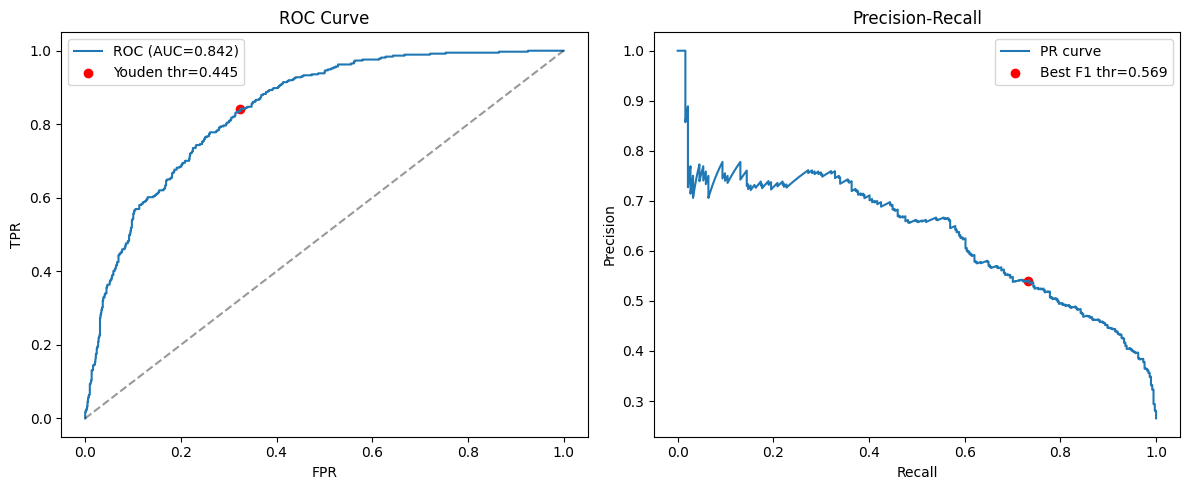


Threshold achieving recall>=0.80 with best precision: 0.4832

== Evaluation at recall>=0.80 choice = 0.4832 ==
Accuracy: 0.7303
              precision    recall  f1-score   support

           0     0.9078    0.7043    0.7933      1035
           1     0.4950    0.8021    0.6122       374

    accuracy                         0.7303      1409
   macro avg     0.7014    0.7532    0.7027      1409
weighted avg     0.7983    0.7303    0.7452      1409

Confusion matrix:
 [[729 306]
 [ 74 300]]


In [23]:
print(f"\nROC AUC: {best_roc_auc:.4f}")

# Plots: ROC and PR with chosen thresholds marked
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# ROC
ax[0].plot(fpr, tpr, label=f'ROC (AUC={best_roc_auc:.3f})')
ax[0].scatter(fpr[best_idx_youden], tpr[best_idx_youden], color='red', label=f"Youden thr={best_thr_youden:.3f}")
ax[0].plot([0,1],[0,1],'k--', alpha=0.4)
ax[0].set_xlabel("FPR")
ax[0].set_ylabel("TPR")
ax[0].set_title("ROC Curve")
ax[0].legend()

# Precision-Recall
ax[1].plot(recall, precision, label='PR curve')
# find PR point corresponding to best F1 threshold
# note: thresholds aligns to prec[1:] and rec[1:], so find nearest
pr_point_idx = np.argmin(np.abs(thresholds - best_thr_f1))
ax[1].scatter(recall[pr_point_idx+1], precision[pr_point_idx+1], color='red', label=f"Best F1 thr={best_thr_f1:.3f}")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")
ax[1].set_title("Precision-Recall")
ax[1].legend()

plt.tight_layout()
plt.show()

# Optionally: pick threshold to satisfy a business constraint, e.g. ensure recall>=0.80 with max precision
desired_recall = 0.80
valid_thrs = thresholds[[i for i,p in enumerate(recall[1:]) if p >= desired_recall]]
if len(valid_thrs):
    # choose the threshold among valid that gives highest precision
    precisions_at_valid = [precision[i+1] for i in range(len(recall)-1) if recall[i+1] >= desired_recall]
    best_idx = int(np.argmax(precisions_at_valid))
    chosen_thr = valid_thrs[best_idx]
    print(f"\nThreshold achieving recall>={desired_recall:.2f} with best precision: {chosen_thr:.4f}")
    eval_at_threshold(chosen_thr, tag=f"recall>={desired_recall:.2f} choice")
else:
    print(f"\nNo threshold found that achieves recall >= {desired_recall:.2f}")

In [25]:
# Apply chosen threshold in practice, save pipeline + threshold

import joblib
import json

# choose threshold (example: best F1 found earlier)
chosen_threshold = best_thr_f1  # or best_thr_youden, or a business-chosen value

# Recompute predictions on test set using chosen threshold
proba_test = pipeline.predict_proba(X_test)[:, 1]
preds_test = (proba_test >= chosen_threshold).astype(int)

print(f"Using threshold = {chosen_threshold:.4f}")
print(classification_report(y_test, preds_test, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, preds_test))

# Save pipeline and threshold for production
model_path = "../models/logreg_pipeline.joblib"
meta_path = "../models/decision_threshold.json"

joblib.dump(pipeline, model_path)
with open(meta_path, "w") as f:
    json.dump({"threshold": float(chosen_threshold)}, f)

print(f"Saved pipeline -> {model_path}")
print(f"Saved threshold -> {meta_path}")

# Helper inference function to use in prod (example)
def predict_with_threshold(model, X, threshold):
    proba = model.predict_proba(X)[:, 1]
    return (proba >= threshold).astype(int), proba

# Example usage on new data X_new (pandas DataFrame)
# loaded_model = joblib.load(model_path)
# with open(meta_path) as f:
#     t = json.load(f)['threshold']
# preds_new, proba_new = predict_with_threshold(loaded_model, X_new, t)
# ...existing code...

Using threshold = 0.5686
              precision    recall  f1-score   support

           0     0.8901    0.7749    0.8285      1035
           1     0.5413    0.7353    0.6236       374

    accuracy                         0.7644      1409
   macro avg     0.7157    0.7551    0.7260      1409
weighted avg     0.7975    0.7644    0.7741      1409

Confusion matrix:
 [[802 233]
 [ 99 275]]
Saved pipeline -> ../models/logreg_pipeline.joblib
Saved threshold -> ../models/decision_threshold.json


In [26]:
X_new = X_test.copy()  # Example new data; replace with actual new data

preds_new, proba_new = predict_with_threshold(pipeline, X_new, t)

In [27]:
print(f"preds_new: {preds_new}")
print(f"proba_new: {proba_new}")

preds_new: [0 0 0 ... 0 0 0]
proba_new: [0.11522129 0.85191417 0.14912751 ... 0.33639317 0.01374393 0.01810235]
